In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [29]:
oct_dataset= pd.read_csv('./2019-Oct 2.csv' , header= 'infer',
                         
                         chunksize=10**6,
                         
                        usecols=['event_type']
                        )

In [30]:
nov_dataset= pd.read_csv('./2019-Nov 2.csv' , header= 'infer',
                          
                        chunksize=10**6,
                        usecols=['event_type']
                        )

In [35]:
chunk_list=[]
for chunk in oct_dataset:
    chunk_list.append(chunk)
    
for chunk in nov_dataset:
    chunk_list.append(chunk)
df_concat= pd.concat(chunk_list) 

<AxesSubplot:xlabel='event_type'>

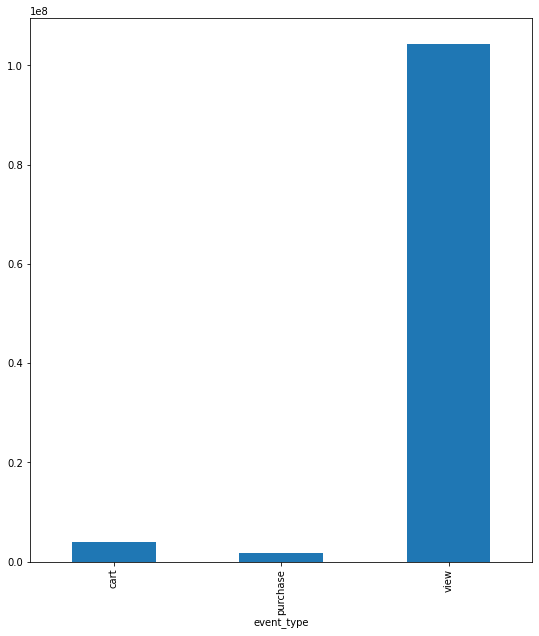

In [36]:
df_concat.groupby('event_type').size().plot.bar(figsize=(9,10)) 

In [22]:
oct_dataset= pd.read_csv('./2019-Oct 2.csv' , header= 'infer',
                         parse_dates=['event_time'],
                date_parser=pd.to_datetime,
                         chunksize=10**6,
                         
                        usecols=['event_type','product_id','event_time']
                        )

In [23]:
nov_dataset= pd.read_csv('./2019-Nov 2.csv' , header= 'infer',
                          parse_dates=['event_time'],
                date_parser=pd.to_datetime,
                        chunksize=10**6,
                        usecols=['event_type','product_id','event_time']
                        )

In [27]:
chunk_list=[]
for chunk in oct_dataset:
    chunk_filter= chunk[chunk.event_type=='view']
    chunk_list.append(chunk_filter)
    
for chunk in nov_dataset:
    chunk_filter= chunk[chunk.event_type=='view']
    chunk_list.append(chunk_filter)
df_concat_view= pd.concat(chunk_list)

In [24]:
chunk_list=[]
for chunk in oct_dataset:
    chunk_filter= chunk[chunk.event_type=='purchase']
    chunk_list.append(chunk_filter)
    
for chunk in nov_dataset:
    chunk_filter= chunk[chunk.event_type=='purchase']
    chunk_list.append(chunk_filter)
df_concat_purchase= pd.concat(chunk_list)

In [31]:
chunk_list=[]
for chunk in oct_dataset:
    chunk_filter= chunk[chunk.event_type=='cart']
    chunk_list.append(chunk_filter)
    
for chunk in nov_dataset:
    chunk_filter= chunk[chunk.event_type=='cart']
    chunk_list.append(chunk_filter)
df_concat_cart= pd.concat(chunk_list)

In [33]:
round(df_concat_view.size / df_concat_cart.size) 

26.0

### This is the average number of times that users see a product before adding it to the cart. We calculated it as the rate between the number of times that users saw the products and the number of products the carted. To get a better result we should have seen for each user how many if the viewed products were actually carted and avoid the number of views of the same product after the cart.

In [42]:
purchase_size=df_concat_purchase.size
print(purchase_size)

4979364


In [12]:
cart_size=df_concat_cart.size
print(cart_size)

11866338


### The number of complete funnels is given by the intersection of three events for each product and user: 'view', 'cart', 'purchase'. As we can see from the graph above, the number of 'view' events is much bigger than the number of the other events, while the number of purchase is the smallest one. So we can say that users that don't complete a funnel stop with the highest probability at the 'view'. Morover we have to consider that users must arrive at the 'purchase' to complete a funnel. But, as we said before, the number of purchases is the smallest among the three, and for this reason we can say that the number of complete funnels is upper bounded by the number of purchases. These two numbers are not equal because 'purchase' event includes also the products that has been bought without 'view' or 'cart'.

In [34]:
probability= 4979364/ 11866338
print(probability)

0.41962094792850163


### The probability  that products added once to the cart are effectively bought is at least equal to the number of favorable cases ( number of products boughts) divided by the number of all the possible cases (number of products added to the cart). We could also use a conditional probabality in this way: P(Boughts | Added) = P(Boughts and Added) / P(Added). We chose the first option because the second one was too computationally expensive because we had to consider the different behavors of the users, without others datas that could help us.

# TASK 2

In [121]:
oct_dataset= pd.read_csv('./2019-Oct 2.csv' , header= 'infer',
                date_parser=pd.to_datetime, chunksize=10**6,
                        usecols=['event_type','category_code'])

### We first have to read our october dataset in chunks of 1 million rows because the complete dataset is too big to be read in one time. We also select only the colums that we need.

([<matplotlib.axis.XTick at 0x1341603a0>,
 [Text(0, 0, 'accessories'),
  Text(1, 0, 'audio'),
  Text(2, 0, 'bag'),
  Text(3, 0, 'bathroom'),
  Text(4, 0, 'bedroom'),
  Text(5, 0, 'belt'),
  Text(6, 0, 'bicycle'),
  Text(7, 0, 'camera'),
  Text(8, 0, 'carriage'),
  Text(9, 0, 'cartrige'),
  Text(10, 0, 'clocks'),
  Text(11, 0, 'components'),
  Text(12, 0, 'costume'),
  Text(13, 0, 'cultivator'),
  Text(14, 0, 'desktop'),
  Text(15, 0, 'dolls'),
  Text(16, 0, 'dress'),
  Text(17, 0, 'ebooks'),
  Text(18, 0, 'environment'),
  Text(19, 0, 'fmcg'),
  Text(20, 0, 'furniture'),
  Text(21, 0, 'iron'),
  Text(22, 0, 'ironing_board'),
  Text(23, 0, 'jacket'),
  Text(24, 0, 'jeans'),
  Text(25, 0, 'kitchen'),
  Text(26, 0, 'lawn_mower'),
  Text(27, 0, 'living_room'),
  Text(28, 0, 'notebook'),
  Text(29, 0, 'peripherals'),
  Text(30, 0, 'personal'),
  Text(31, 0, 'scarf'),
  Text(32, 0, 'sewing_machine'),
  Text(33, 0, 'shirt'),
  Text(34, 0, 'shoes'),
  Text(35, 0, 'shorts'),
  Text(36, 0, 'skat

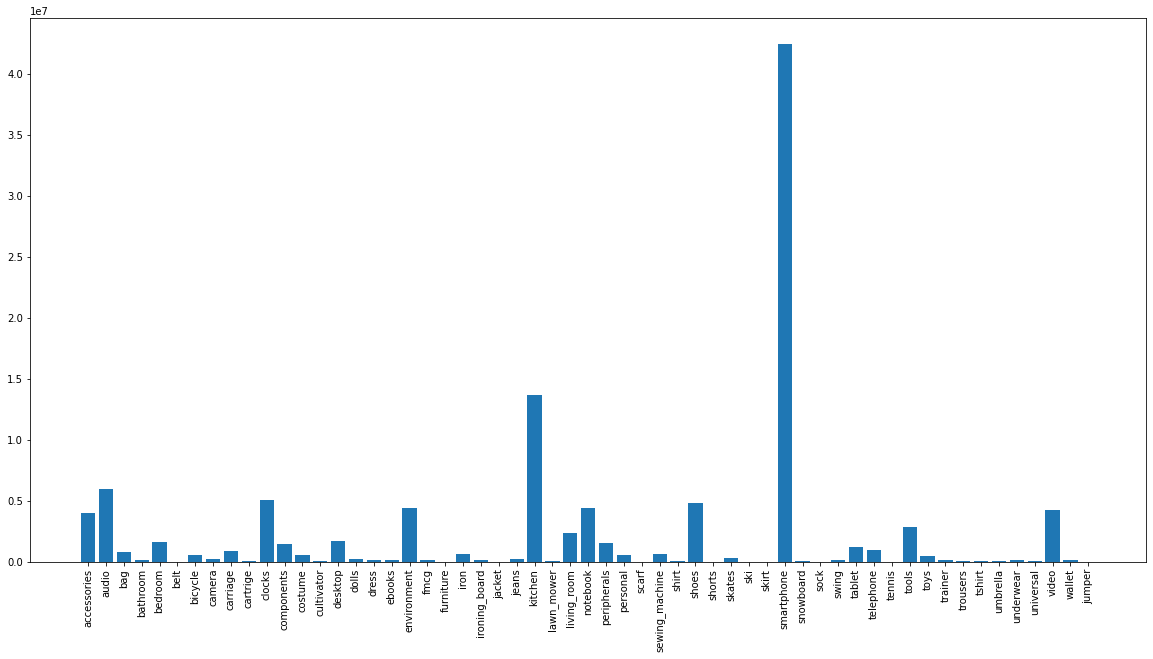

In [122]:
dic={} # we initialize a dictionary
for chunk in oct_dataset:
    temp=chunk[chunk.category_code.notna()==True] # we filter out the rows that are null on category_code to create a temporary object
    dataset_with_cat_sub=temp.assign(main_category=(temp.category_code.str.split('.')).str[0],sub_category=(
    temp.category_code.str.split('.')).str[1]) # we make two new columns, one with the category, the other with the subcategory
    iterate=dataset_with_cat_sub[dataset_with_cat_sub.event_type=='view'].groupby('sub_category') # we group by subcategory only the rows with event_type view 
    for sub, row in iterate:
        if(sub not in dic):   # we create the new subcategory in the dictionary if its not present yet
            dic[sub]=row.size
        else:
            dic[sub]+=row.size  # we add the number of rows of a subcategory in this chunk


            
plt.figure(figsize=(20,10))
plt.bar(range(len(dic)), dic.values())
plt.xticks(range(len(dic)), list(dic.keys()),rotation= 'vertical')

    


###  In the plot we can see the most viewed subcategories of october (first smartphone, follwed by kitchen).


In [125]:
nov_dataset= pd.read_csv('./2019-Nov 2.csv' , header= 'infer',
                date_parser=pd.to_datetime, chunksize=10**6,
                        usecols=['event_type','category_code'])

([<matplotlib.axis.XTick at 0x13e9fb8e0>,
 [Text(0, 0, 'accessories'),
  Text(1, 0, 'audio'),
  Text(2, 0, 'bag'),
  Text(3, 0, 'bathroom'),
  Text(4, 0, 'bedroom'),
  Text(5, 0, 'belt'),
  Text(6, 0, 'bicycle'),
  Text(7, 0, 'camera'),
  Text(8, 0, 'carriage'),
  Text(9, 0, 'cartrige'),
  Text(10, 0, 'clocks'),
  Text(11, 0, 'components'),
  Text(12, 0, 'costume'),
  Text(13, 0, 'cultivator'),
  Text(14, 0, 'desktop'),
  Text(15, 0, 'dolls'),
  Text(16, 0, 'dress'),
  Text(17, 0, 'ebooks'),
  Text(18, 0, 'environment'),
  Text(19, 0, 'fmcg'),
  Text(20, 0, 'furniture'),
  Text(21, 0, 'iron'),
  Text(22, 0, 'ironing_board'),
  Text(23, 0, 'jeans'),
  Text(24, 0, 'jumper'),
  Text(25, 0, 'kitchen'),
  Text(26, 0, 'lawn_mower'),
  Text(27, 0, 'living_room'),
  Text(28, 0, 'notebook'),
  Text(29, 0, 'peripherals'),
  Text(30, 0, 'personal'),
  Text(31, 0, 'scarf'),
  Text(32, 0, 'sewing_machine'),
  Text(33, 0, 'shirt'),
  Text(34, 0, 'shoes'),
  Text(35, 0, 'shorts'),
  Text(36, 0, 'skat

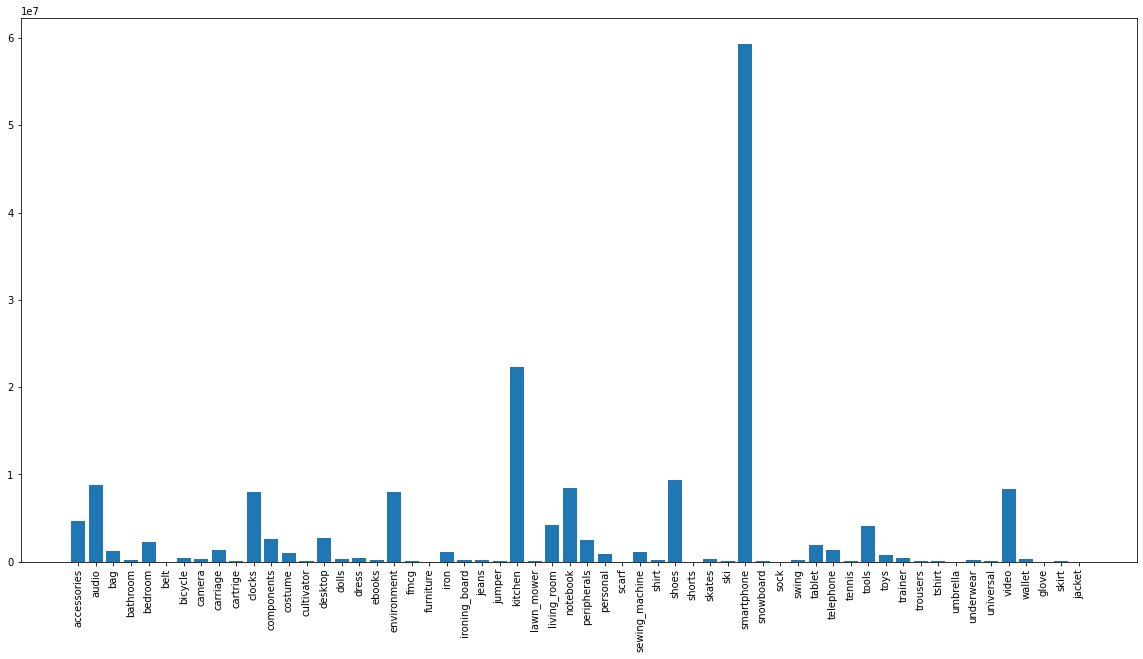

In [126]:
dic={}
for chunk in nov_dataset:
    temp=chunk[chunk.category_code.notna()==True]
    dataset_with_cat_sub=temp.assign(main_category=(temp.category_code.str.split('.')).str[0],sub_category=(
    temp.category_code.str.split('.')).str[1]) 
    iterate=dataset_with_cat_sub[dataset_with_cat_sub.event_type=='view'].groupby('sub_category')
    for sub, row in iterate:
        if(sub not in dic):
            dic[sub]=row.size
        else:
            dic[sub]+=row.size


            
plt.figure(figsize=(20,10))
plt.bar(range(len(dic)), dic.values())
plt.xticks(range(len(dic)), list(dic.keys()),rotation= 'vertical')


### We applyied the same method for November. The results are very similar

In [166]:
oct_dataset= pd.read_csv('./2019-Oct 2.csv' , header= 'infer',
                date_parser=pd.to_datetime, chunksize=10**6,
                        usecols=['event_type','category_code','product_id']
                        )

In [167]:
chunk_list=[]
for chunk in oct_dataset:
    chunk_filter=chunk[chunk.category_code.notna()==True]
    chunk_filter_2=chunk_filter[chunk_filter.event_type=='purchase']
    chunk_list.append(chunk_filter_2)
df_concat = pd.concat(chunk_list)    

In [169]:
df_concat

,event_type,product_id,category_code
162,purchase,1004856,electronics.smartphone
308,purchase,1002532,electronics.smartphone
442,purchase,13800054,furniture.bathroom.toilet
574,purchase,4804055,electronics.audio.headphone
603,purchase,4804056,electronics.audio.headphone
...,...,...,...
42447959,purchase,1004767,electronics.smartphone
42448173,purchase,47500017,construction.tools.light
42448271,purchase,1003306,electronics.smartphone
42448362,purchase,1004240,electronics.smartphone


In [173]:
dataset_with_cat_oct=df_concat.assign(main_category=(df_concat.category_code.str.split('.')).str[0]) 

In [175]:
dataset_with_cat_oct

,event_type,product_id,category_code,main_category
162,purchase,1004856,electronics.smartphone,electronics
308,purchase,1002532,electronics.smartphone,electronics
442,purchase,13800054,furniture.bathroom.toilet,furniture
574,purchase,4804055,electronics.audio.headphone,electronics
603,purchase,4804056,electronics.audio.headphone,electronics
...,...,...,...,...
42447959,purchase,1004767,electronics.smartphone,electronics
42448173,purchase,47500017,construction.tools.light,construction
42448271,purchase,1003306,electronics.smartphone,electronics
42448362,purchase,1004240,electronics.smartphone,electronics


In [177]:
iterate=dataset_with_cat_oct.groupby('main_category')

In [179]:
for category, row in iterate:
    print('category:',category)
    print(row.groupby('product_id').size().nlargest(10))

category: accessories
product_id
18300155    63
18300021    34
52900016    31
28300780    24
49800017    23
28300432    21
18300595    17
18300214    16
18300496    16
28400774    16
dtype: int64
category: apparel
product_id
28718083    72
28715756    46
28712682    45
28715827    40
28715757    39
28717034    39
28703609    38
28715829    38
28716983    38
54900011    37
dtype: int64
category: appliances
product_id
3700926    1675
3600661    1482
3600163    1017
3600666     877
2900536     831
3601405     768
3601485     627
2701657     566
3601244     559
3701134     543
dtype: int64
category: auto
product_id
6000094    785
4700478    411
5701128    382
6000227    360
5701166    304
4700630    300
4700589    235
6000229    214
6000004    206
5700518    165
dtype: int64
category: computers
product_id
1307310    1003
1307073     864
1307366     722
1307067     651
1306650     649
1307074     416
1307188     378
1307187     356
1306359     350
1307350     324
dtype: int64
category: cons

### We have to find the 10 most sold products of each category, so after we took all the rows with event_type purchase we grouped the dataframe two times. The first tyme using main_category, then for each subgroup using the product_id. Then we printed only the 10 largest in size for each category (october).

In [189]:
nov_dataset= pd.read_csv('./2019-Nov 2.csv' , header= 'infer',
                date_parser=pd.to_datetime, chunksize=10**6,
                        usecols=['event_type','category_code','product_id']
                        )

In [190]:
chunk_list=[]
for chunk in nov_dataset:
    chunk_filter=chunk[chunk.category_code.notna()==True]
    chunk_filter_2=chunk_filter[chunk_filter.event_type=='purchase']
    chunk_list.append(chunk_filter_2)
df_concat = pd.concat(chunk_list)    

In [191]:
dataset_with_cat_nov=df_concat.assign(main_category=(df_concat.category_code.str.split('.')).str[0]) 

In [192]:
iterate=dataset_with_cat_nov.groupby('main_category')

In [193]:
for category, row in iterate:
    print('category_code:',category)
    print(row.groupby('product_id').size().nlargest(10))

category_code: accessories
product_id
18300021    53
28401112    48
18300155    42
18300460    38
28400759    36
18300141    27
28400912    24
18300214    23
28401075    23
18300076    20
dtype: int64
category_code: apparel
product_id
28720716    98
54900013    89
28716978    74
54900004    74
28719635    69
28716666    65
28716519    64
28719606    64
28719076    59
28713229    58
dtype: int64
category_code: appliances
product_id
3700926    1764
3600661    1742
3601405    1140
3600666    1131
2900958     903
3601603     895
3700766     895
3600163     879
2702277     675
3701134     624
dtype: int64
category_code: auto
product_id
6000094    1100
6000227     489
4700478     483
5701166     274
6000004     274
6000229     253
5701128     246
5701002     244
6000157     211
5701086     182
dtype: int64
category_code: computers
product_id
1307310    1329
1307545     879
1307188     829
1307073     740
1307067     538
1307076     500
1307589     473
1307004     390
1307187     388
1307135 

### Finally we obtained for every category the 10 most sold products reported by their product_id for november.

# Task 3

In [22]:
oct_dataset= pd.read_csv('./2019-Oct 2.csv' , header= 'infer',
                date_parser=pd.to_datetime, chunksize=10**6,
                        usecols=['event_type','category_code','brand','price']
                        )

In [23]:
nov_dataset= pd.read_csv('./2019-Nov 2.csv' , header= 'infer',
                date_parser=pd.to_datetime, chunksize=10**6,
                        usecols=['event_type','category_code','brand','price']
                        )

In [24]:
chunk_list=[]  # we start a list
for chunk in oct_dataset:  # for the october dataset
    chunk_filter=chunk[(chunk.category_code.notna()==True) & (chunk.brand.notna()==True)] # we filter out the rows that are null on brand and on category_code
    chunk_filter_2=chunk_filter[chunk_filter.event_type=='purchase'] # we filter only the rows with the purchases
    chunk_list.append(chunk_filter_2) # we append those rows to the list
    
for chunk in nov_dataset: # the same with the november dataset
    chunk_filter=chunk[(chunk.category_code.notna()==True) & (chunk.brand.notna()==True)]
    chunk_filter_2=chunk_filter[chunk_filter.event_type=='purchase']
    chunk_list.append(chunk_filter_2)
df_concat = pd.concat(chunk_list)    #  we create a merged dataframe   

In [28]:
product_with_brand_and_cat=df_concat.assign(main_category=(df_concat.category_code.str.split('.')).str[0])
#we add a column for the category

### here we consider the first part of the category code because we are interested in the category of the object

In [29]:
grouped=product_with_brand_and_cat.groupby('main_category') 

### we split the dataframe in sub-dataframes using the object categories

In [98]:
cat_list=[] # we are going to create a list of tuples 
for category, row in grouped:
    group_by_brand=row.groupby('brand')
    #print(group_by_brand.groups)
    cat_list.append((category,group_by_brand.price.mean().nlargest(1),group_by_brand.price.mean().nlargest(1).values[0]))

In [99]:
cat_list_sorted=sorted(cat_list,key= lambda x : x[2],reverse=True)

### In the tuple there are the name of the category and the average price of the most expensive brand for that category. We use the average price to order the list.

In [100]:
for item in cat_list_sorted:
    print(item)

('electronics', brand
rado    1956.29
Name: price, dtype: float64, 1956.29)
('appliances', brand
jura    1893.3925
Name: price, dtype: float64, 1893.3925000000002)
('computers', brand
dreammachines    1801.82
Name: price, dtype: float64, 1801.82)
('kids', brand
hartan    1801.82
Name: price, dtype: float64, 1801.82)
('construction', brand
senci    1640.642222
Name: price, dtype: float64, 1640.6422222222222)
('sport', brand
bafang    1528.69
Name: price, dtype: float64, 1528.69)
('furniture', brand
bellamebel    1030.407059
Name: price, dtype: float64, 1030.4070588235293)
('auto', brand
t-max    557.238621
Name: price, dtype: float64, 557.2386206896551)
('country_yard', brand
viking    537.054
Name: price, dtype: float64, 537.054)
('accessories', brand
weekend    517.39
Name: price, dtype: float64, 517.39)
('apparel', brand
head    414.2975
Name: price, dtype: float64, 414.2974999999999)
('medicine', brand
omron    46.09511
Name: price, dtype: float64, 46.09510971786855)
('stationery', 

### The category with the most expensive brand is electronics with rado

In [101]:
def aver_price():
    category=str(input('Please insert the name of the category: '))
    cat_dataset=product_with_brand_and_cat[product_with_brand_and_cat.main_category==category]
    try:
        cat_dataset.groupby('brand').price.mean().plot.bar(figsize=(50,50))
    except:
        print('Cannot plot for the category inserted')
    return

### here it is implemented the function that takes in imput the name of the category and returns a plot with the average price of each category

Please insert the name of the category: electronics


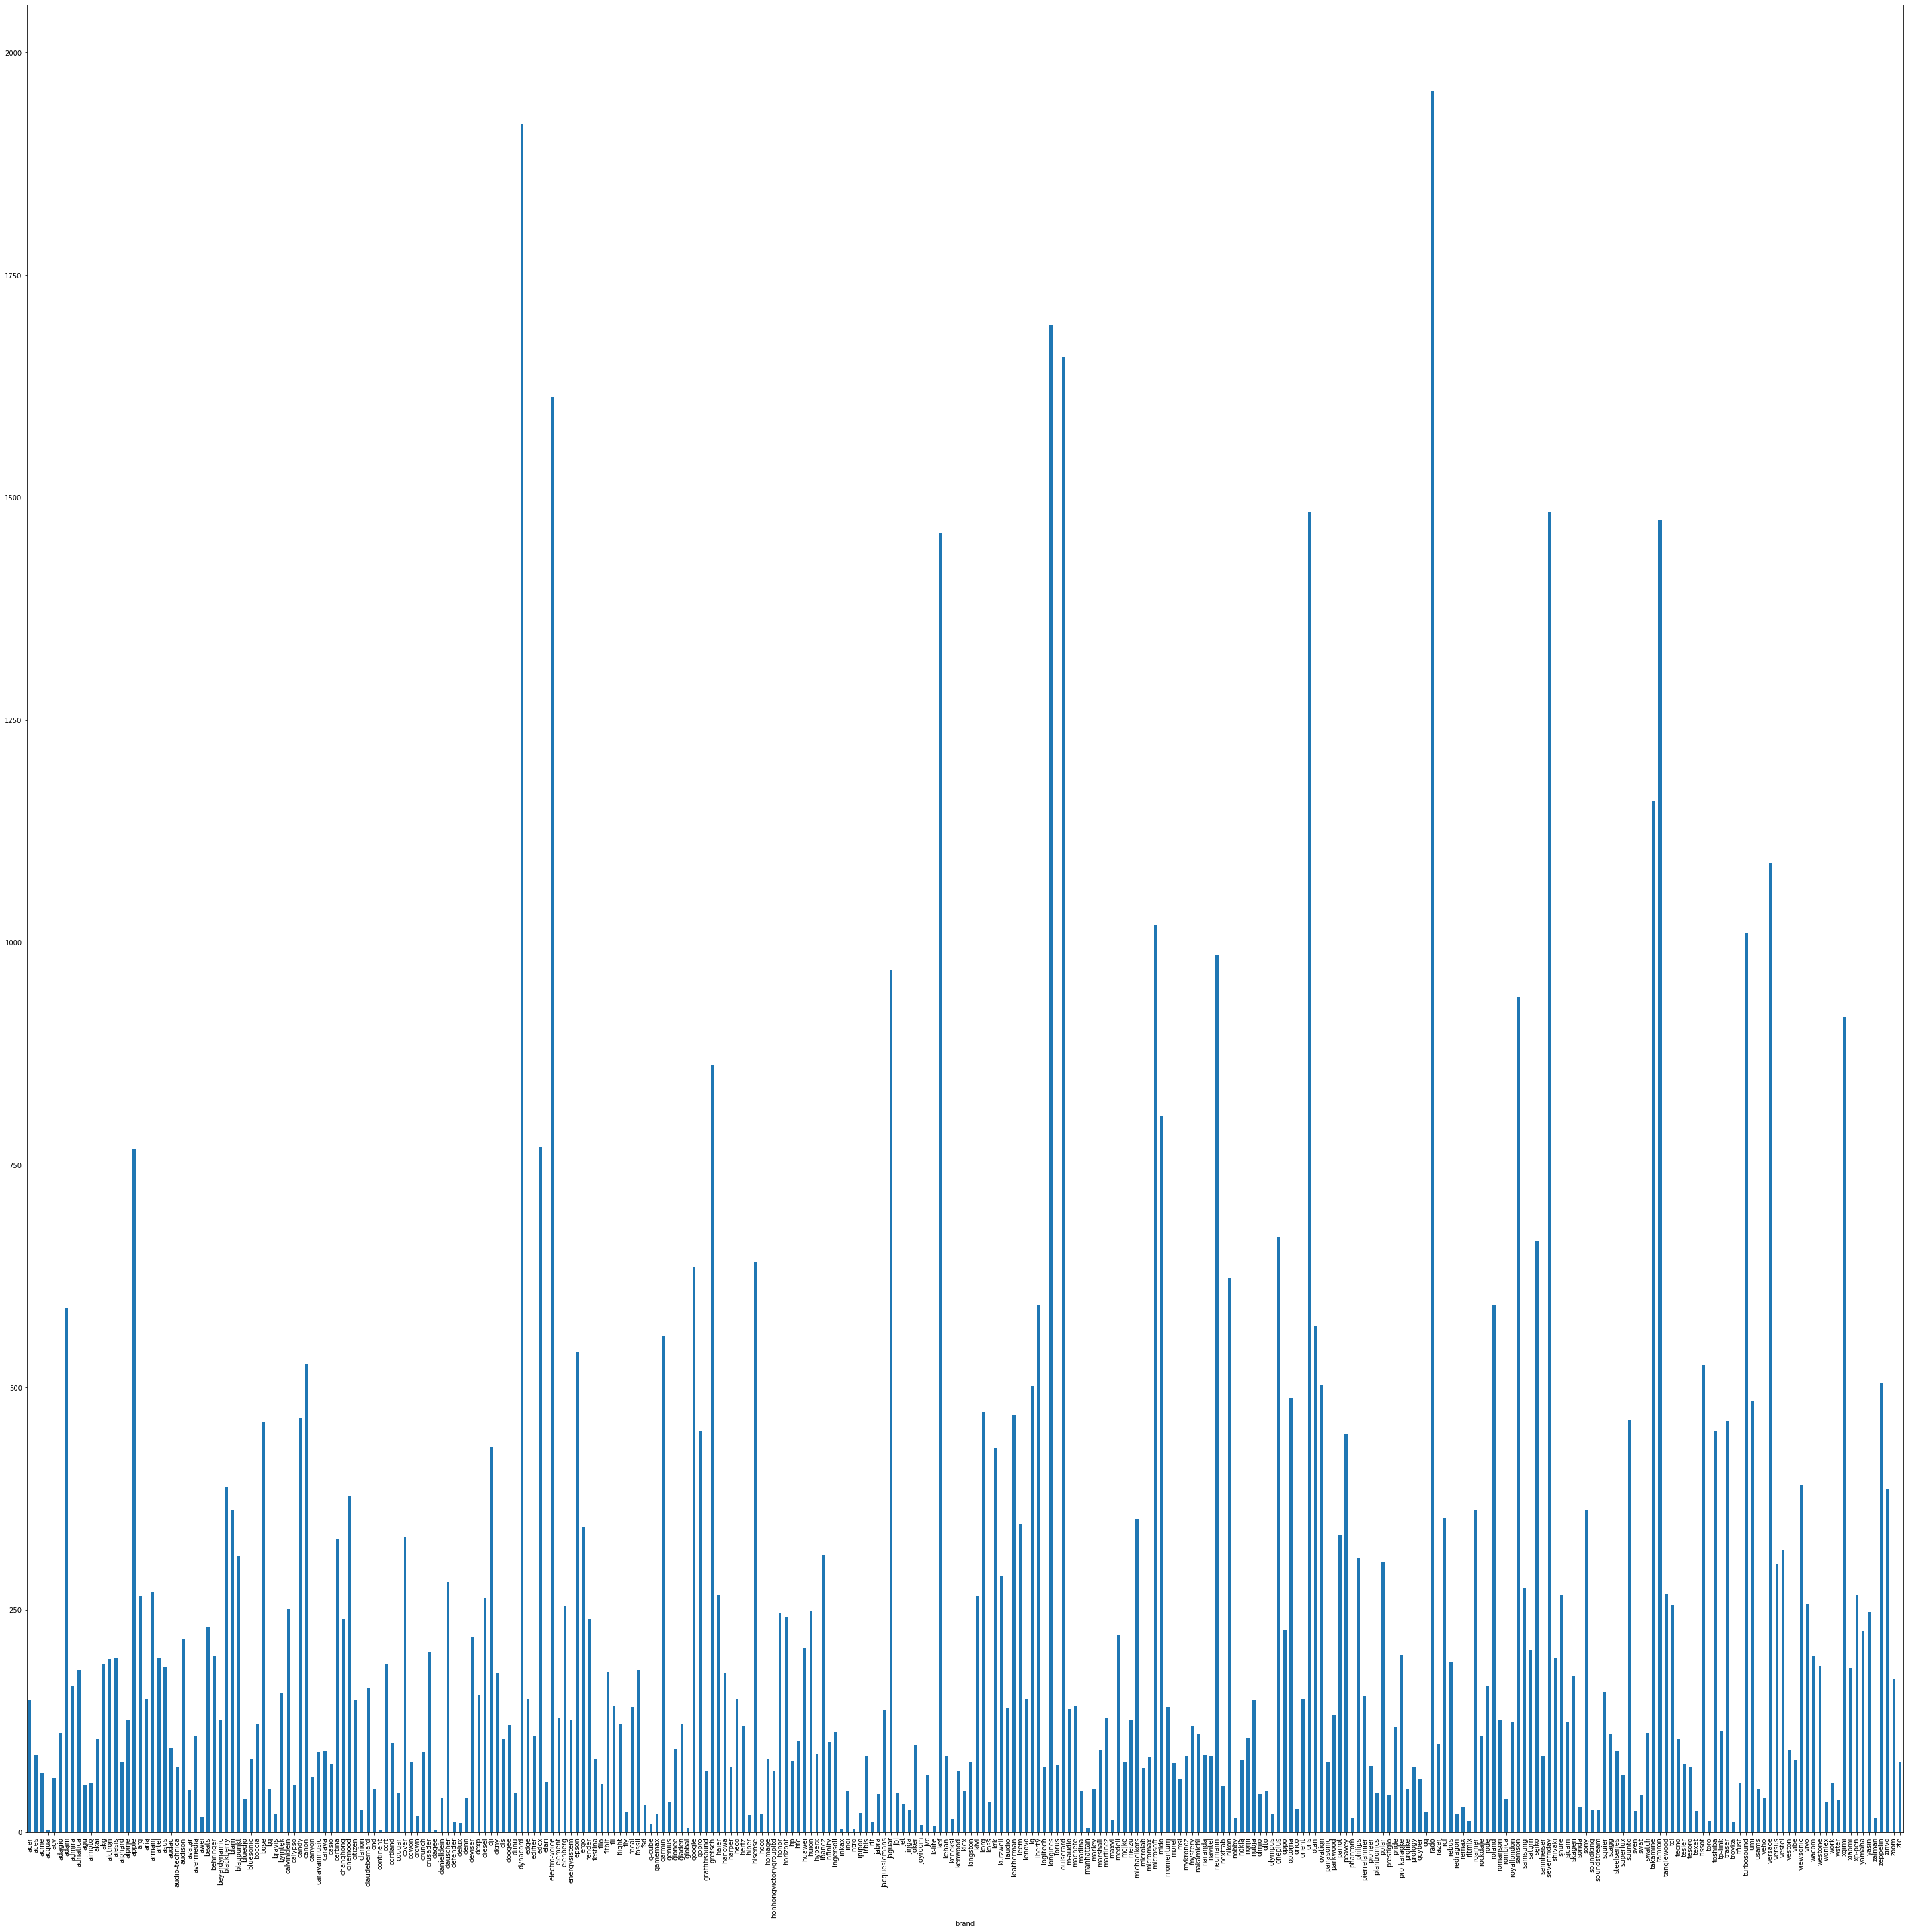

In [73]:
aver_price()

### For example we plotted electronics

# Task 4


In [25]:
oct_dataset= pd.read_csv('./2019-Oct 2.csv' , header= 'infer',
                date_parser=pd.to_datetime, chunksize=10**6,
                        usecols=['event_type','brand','price']
                        )

### here we select the columns event_type, brand, and price

In [26]:
chunk_list=[]
for chunk in oct_dataset:
    chunk_filter=chunk[chunk.brand.notna()==True]
    chunk_filter_2=chunk_filter[chunk_filter.event_type=='purchase']
    chunk_list.append(chunk_filter_2)
df_concat_oct = pd.concat(chunk_list)  

### The same thing with november dataset

In [27]:
nov_dataset= pd.read_csv('./2019-Nov 2.csv' , header= 'infer',
                date_parser=pd.to_datetime, chunksize=10**6,
                        usecols=['event_type','brand','price']
                        )

In [28]:
chunk_list=[]
for chunk in nov_dataset:
    chunk_filter=chunk[chunk.brand.notna()==True]
    chunk_filter_2=chunk_filter[chunk_filter.event_type=='purchase']
    chunk_list.append(chunk_filter_2)
df_concat_nov = pd.concat(chunk_list)

In [29]:
def avg_brand_profit(brand_name):
    oct_profit= df_concat_oct[df_concat_oct.brand==brand_name].price.sum()
    nov_profit= df_concat_nov[df_concat_nov.brand==brand_name].price.sum()
    return oct_profit,nov_profit
    

### We define the function 'avg_brand_profict'. It takes in input the name of the brand, that is a string. It return two results: the october and november profits for that brand. In his body it filters the purchase dataset using the column 'brand_name'. It considers only the rows with the brand name equal to the one given as input. Then proceeds to sum all the prices.

In [30]:
avg_brand_profit('jaguar')

(33135.97000000001, 44119.490000000005)

In [31]:
brands=list(df_concat_oct.brand.unique())
brands[0]


'samsung'

In [32]:
brands=list(oct_pur.brand.unique())
def find_the_loss():
    result=[]
    for i in range(3): # we find for three times the brand with the higer loss.
        max_loss=0    
        brand_with_max_loss=''
        percent=0
           # here we save a tuple for each brand to store the brand name, the loss in absolute value and in percentage
        for item in brands: # brand is an array that contains all the brands
            october,november=avg_brand_profit(item) # we use the function we defined before to get the profits 
            if(october-november > max_loss): # we look for the maximum loss, using the difference between october and november profits
                max_loss=october-november
                brand_with_max_loss=item
                percent=(max_loss/october)*100
        result.append((brand_with_max_loss,max_loss,percent))
        brands.remove(brand_with_max_loss) # we remove the brand with the highest loss to search for the others.
        percent=0
        max_loss=0
        brand_with_max_loss=''
    return result

    

In [33]:
find_the_loss() # this returns the three brands that lost the most in absolute value.

[('acer', 229412.98999999976, 6.414061508518838),
 ('peda', 171063.43, 77.98923208498204),
 ('omabelle', 145833.73999999993, 41.93868091147615)]

### We obtained the three brands tha lost the most in absolute value, and their loss in percent, between october and november 2019. We choose to prioritize the net loss over the loss in percentage, thinking the store may be more interested in it.

In [244]:
avg_brand_profit('peda')

(219342.37, 48278.94)

# Task 5

In [251]:
oct_dataset= pd.read_csv('./2019-Oct 2.csv' , header= 'infer',
                         parse_dates=['event_time'],
                date_parser=pd.to_datetime, chunksize=10**6,
                         
                        usecols=['event_type','event_time']
                        )

In [252]:
nov_dataset= pd.read_csv('./2019-Nov 2.csv' , header= 'infer',
                         parse_dates=['event_time'],
                date_parser=pd.to_datetime, chunksize=10**6,
                        usecols=['event_type','event_time']
                        )

In [253]:
chunk_list=[]
for chunk in oct_dataset:
    chunk_filter_2=chunk[chunk.event_type=='view']
    chunk_list.append(chunk_filter_2)
    
for chunk in nov_dataset:
    chunk_filter_2=chunk[chunk.event_type=='view']
    chunk_list.append(chunk_filter_2)
df_concat = pd.concat(chunk_list) 

In [254]:
days = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
]
# this is an array that we will use to convert the number of the day ('dayofweek' output) into a string

In [256]:
view_with_days=df_concat.assign(weekday= df_concat.event_time.dt.dayofweek) 

### We created a new dataset with another column that corresponds to the number of the day of the week, in which the 'view' event happened.

In [258]:
day_grouped=view_with_days.groupby([view_with_days.weekday])

### We grouped the new dataset by the column we just created. In this way we have a subgroup for each day.

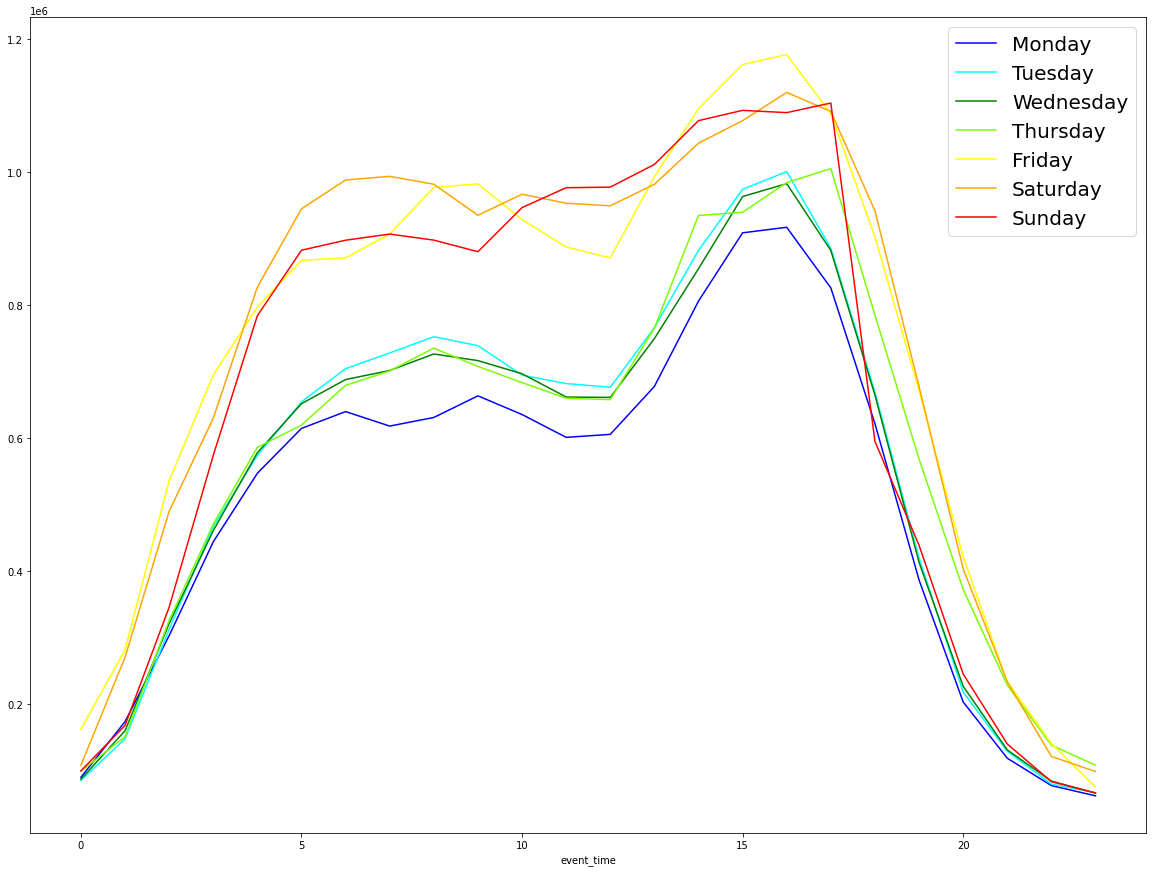

In [259]:
colors=['blue','cyan','green','lawngreen','yellow', 'orange','red']
i=0
for weekday,row in day_grouped:
    
    row.groupby(row.event_time.dt.hour).size().plot(figsize=(20,15),label=days[weekday],color=colors[i]).legend(prop={'size': 20})
    i+=1

### For each subgroup we grouped by the hour and we counted the number of views for each hour. Then we plotted with seven lines of different colors that represent the days.  As we can see the site is more visited during the day, in particular at 10-12 and 16-18. The site reaches the highest views in the weekend

# Task 6

In [10]:
oct_dataset= pd.read_csv('./2019-Oct 2.csv' , header= 'infer',
                         
                         chunksize=10**6,
                         
                        usecols=['event_type']
                        )

In [11]:
nov_dataset= pd.read_csv('./2019-Nov 2.csv' , header= 'infer',
                          
                        chunksize=10**6,
                        usecols=['event_type']
                        )

In [8]:
chunk_list=[]
for chunk in oct_dataset:
    chunk_filter_2=chunk[chunk.event_type=='view']
    chunk_list.append(chunk_filter_2)
    
for chunk in nov_dataset:
    chunk_filter_2=chunk[chunk.event_type=='view']
    chunk_list.append(chunk_filter_2)
df_concat_view = pd.concat(chunk_list) 

In [12]:
chunk_list=[]
for chunk in oct_dataset:
    chunk_filter_2=chunk[chunk.event_type=='purchase']
    chunk_list.append(chunk_filter_2)
    
for chunk in nov_dataset:
    chunk_filter_2=chunk[chunk.event_type=='purchase']
    chunk_list.append(chunk_filter_2)
df_concat_purchase = pd.concat(chunk_list) 

In [13]:
overall_conversion_rate= df_concat_purchase.size/df_concat_view.size

### We counted the number of rows in the purchase dataset and the number of rows in the view dataset. Then we divided them

In [14]:
overall_conversion_rate

0.01590817944828352

### This is the overall conversion rate of the  online store.

In [21]:
oct_dataset= pd.read_csv('./2019-Oct 2.csv' , header= 'infer',
                         
                         chunksize=10**6,
                         
                        usecols=['event_type','category_code']
                        )

In [22]:
nov_dataset= pd.read_csv('./2019-Nov 2.csv' , header= 'infer',
                          
                        chunksize=10**6,
                        usecols=['event_type','category_code']
                        )

In [20]:
chunk_list=[]
for chunk in oct_dataset:
    chunk_filter_2=chunk[(chunk.category_code.notna()==True) & (chunk.event_type=='view')]
    chunk_list.append(chunk_filter_2)
    
for chunk in nov_dataset:
    chunk_filter_2=chunk[(chunk.category_code.notna()==True) & (chunk.event_type=='view')]
    chunk_list.append(chunk_filter_2)
df_concat_view = pd.concat(chunk_list) 

In [23]:
chunk_list=[]
for chunk in oct_dataset:
    chunk_filter_2=chunk[(chunk.category_code.notna()==True) & (chunk.event_type=='purchase')]
    chunk_list.append(chunk_filter_2)
    
for chunk in nov_dataset:
    chunk_filter_2=chunk[(chunk.category_code.notna()==True) & (chunk.event_type=='purchase')]
    chunk_list.append(chunk_filter_2)
df_concat_purchase = pd.concat(chunk_list) 

In [24]:
purchase_grouped=df_concat_purchase.assign(main_category=(df_concat_purchase.category_code.str.split('.')).str[0]).groupby('main_category')

### We add another column with the category

In [26]:
dic_purchases={}
for category,row in purchase_grouped:
    dic_purchases[category]=row.size


In [29]:
dic_view={}
view_grouped= df_concat_view.groupby(df_concat_view.category_code.str.split('.').str[0])
for category,row in view_grouped:
    dic_view[category]=row.size


### we created two dictionaries equal to each other, one for purchase and the other for view. The keys are the names of the categories and the values are the number of times in which an object from a certain category was viewed or purchased.

<AxesSubplot:ylabel='None'>

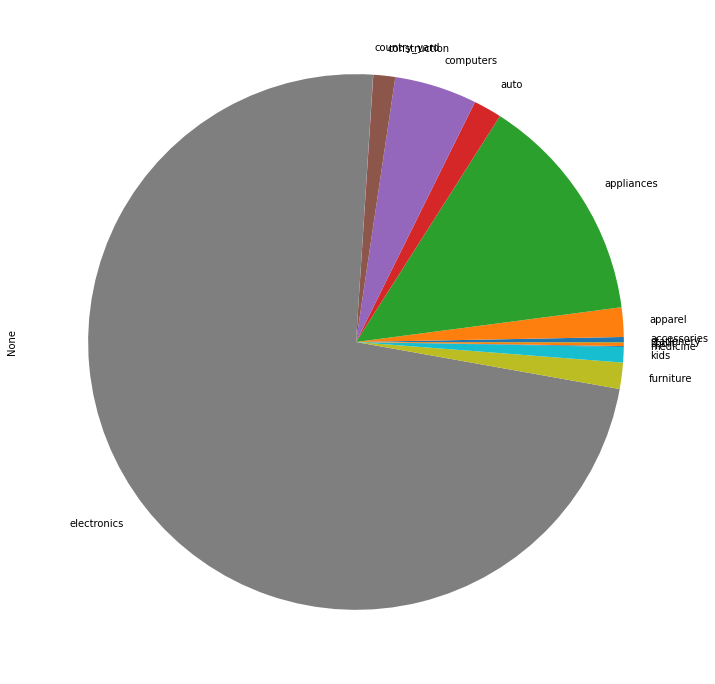

In [285]:
purchase_grouped.size().plot.pie(figsize=(12,20))

In [32]:
purchase_list=[] # in this list we store a tuple for each category: (category, conversion rate)
for key in dic_purchases.keys(): # we iterate over the keys of the first dictionary and we divide the values found with the corrispondong values (same key) from the other dictionary
    purchase_list.append((key,dic_purchases[key] / dic_view[key]))
sorted_list=sorted(purchase_list,key= lambda x : x[1],reverse=True) # we order the tuples using the conversion rate in decreasing order
for elem in sorted_list: 
    print(*elem)

electronics 0.037135496330717215
medicine 0.02823996775865047
stationery 0.025229001707809347
appliances 0.020332973046404103
computers 0.014845719506438338
auto 0.014834504793516818
construction 0.014064401890710222
kids 0.013523198880497089
sport 0.00984733320966448
accessories 0.009102558903442961
furniture 0.009032546847735377
apparel 0.007442851151017149
country_yard 0.006334986402175652


# Task 7

In [113]:
# Find 20% of the users that spend the most on the site using the purchase dataframe and counting how much each user spent

In [6]:
oct_dataset= pd.read_csv('./2019-Oct 2.csv' , header= 'infer',
                         
                         chunksize=10**6,
                         
                        usecols=['event_type','user_id','price']
                        )

In [7]:
nov_dataset= pd.read_csv('./2019-Nov 2.csv' , header= 'infer',
                          
                        chunksize=10**6,
                        usecols=['event_type','user_id','price']
                        )

In [8]:
chunk_list=[]
for chunk in oct_dataset:
    chunk_filter_2=chunk[(chunk.event_type=='purchase')]
    chunk_list.append(chunk_filter_2)
    
for chunk in nov_dataset:
    chunk_filter_2=chunk[(chunk.event_type=='purchase')]
    chunk_list.append(chunk_filter_2)
df_concat_purchase = pd.concat(chunk_list) 

In [9]:
df_concat_purchase.user_id.nunique() #users that did at least one purchase

697470

In [10]:
697470*0.2  #this is the 20% of active users

139494.0

In [11]:
users_from_total=df_concat_purchase.groupby('user_id').price.sum().nlargest(139494) #get the most active users

In [12]:
active_users_business_1 =0
for elem in users_from_total:
    active_users_business_1+=elem   #sum how much they spent togheter

In [13]:
active_users_business_1 #if this corresponds to the 80% of the business of site we demonstrated the principle

364222233.810022

In [14]:
total_business=df_concat_purchase.price.sum() # total business of the site

In [15]:
total_business  

505152392.76999974

In [17]:
total_business * 0.8

404121914.21599984

In [19]:
364222233.810022 / 505152392.76999974

0.7210145671345073

###  If we consider the 20% of users that bought one thing at least,  we can see that we are near to the expected distribution (72%). If we had not ruled out the users that did not buy anything, the number would have been even bigger.